# ***Desafío 1***

El objetivo de este desafío es hacer un EDA sobre estos datos 'ofertas_relampago.csv' buscando insights sobre este tipo de ofertas.

## *Exploración de los datos*

Comienzo llamando a las bibliotecas necesarias

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
%matplotlib inline

Leo el archivo con los datos

In [260]:
data = pd.read_csv('ofertas_relampago.csv', infer_datetime_format = True)

Veo la cantidad de filas y columnas que tengo

In [261]:
data.shape

(48746, 13)

Observo la estructura de los 10 primeros datos

In [262]:
data.head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


In [263]:
# Corro esta celda varias veces para ver si los datos lucen todos parecidos a los primeros
data.sample(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1513,2021-07-08,2021-07-08 12:00:00+00:00,2021-07-08 20:00:00+00:00,lightning_deal,41,40,24.68,1.0,A,free_shipping,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
9312,2021-07-20,2021-07-20 15:00:00+00:00,2021-07-20 15:00:00+00:00,lightning_deal,2,2,NaN,NaN,A,free_shipping,PETS FOOD,CPG,MLM-DOG_SUPPLEMENTS
40281,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,MOBILE,CE,MLM-CELLPHONES
28565,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 01:00:00+00:00,lightning_deal,15,14,2.02,1.0,NaN,none,PERSONAL CARE,BEAUTY & HEALTH,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES
9357,2021-07-20,2021-07-20 18:00:00+00:00,2021-07-20 21:00:00+00:00,lightning_deal,30,29,24.36,1.0,A,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SNEAKERS
26302,2021-06-17,2021-06-17 19:00:00+00:00,2021-06-18 01:00:00+00:00,lightning_deal,5,1,24.84,5.0,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-FOOTWEAR
16167,2021-06-23,2021-06-23 19:00:00+00:00,2021-06-24 01:00:01+00:00,lightning_deal,15,14,6.18,1.0,NaN,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-MANICURE_AND_PEDICURE_SUPPLIES
7264,2021-07-03,2021-07-03 13:00:00+00:00,2021-07-03 19:00:02+00:00,lightning_deal,15,13,26.89,2.0,NaN,free_shipping,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-HEALTH_CARE_SUPPLIES
27223,2021-07-01,2021-07-01 18:00:00+00:00,2021-07-02 01:00:04+00:00,lightning_deal,5,5,NaN,NaN,A,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-FACIAL_SKIN_CARE_PRODUCTS
8052,2021-07-07,2021-07-07 13:00:00+00:00,2021-07-07 19:00:03+00:00,lightning_deal,5,1,6.33,4.0,NaN,none,PERSONAL CARE,BEAUTY & HEALTH,MLM-MAKEUP_BRUSHES


Qué porcentaje de los datos son nulos por columna? Es importante conocer este dato porque algunas funciones u operaciones rompen con datos nulos

In [264]:
perc_null = data.isnull().sum() * 100 / len(data)
nulos=pd.DataFrame({'Porcentaje de datos nulos': perc_null}).sort_values('Porcentaje de datos nulos',ascending = False)
nulos

,Porcentaje de datos nulos
ORIGIN,76.785788
SOLD_AMOUNT,49.577401
SOLD_QUANTITY,49.577401
OFFER_START_DATE,0.000000
OFFER_START_DTTM,0.000000
OFFER_FINISH_DTTM,0.000000
OFFER_TYPE,0.000000
INVOLVED_STOCK,0.000000
REMAINING_STOCK_AFTER_END,0.000000
SHIPPING_PAYMENT_TYPE,0.000000


Hago un value_counts de cada columna para comenzar a ver como está conformado cada campo.

In [265]:
for campo in data.columns:
  print("\n############################## ",campo," ##############################\n")
  print(data[campo].value_counts())


##############################  OFFER_START_DATE  ##############################

2021-07-30    1300
2021-07-29    1299
2021-07-08    1267
2021-07-31    1228
2021-07-28    1214
              ... 
2021-06-07     426
2021-06-06     412
2021-06-09     366
2021-06-08     317
2021-06-30     254
Name: OFFER_START_DATE, Length: 61, dtype: int64

##############################  OFFER_START_DTTM  ##############################

2021-07-30 13:00:00+00:00    414
2021-07-29 13:00:00+00:00    411
2021-07-28 13:00:00+00:00    387
2021-07-31 13:00:00+00:00    373
2021-07-27 13:00:00+00:00    363
                            ... 
2021-06-12 18:00:00+00:00      1
2021-07-15 18:00:00+00:00      1
2021-07-15 03:00:00+00:00      1
2021-07-17 22:00:00+00:00      1
2021-07-04 20:00:00+00:00      1
Name: OFFER_START_DTTM, Length: 783, dtype: int64

##############################  OFFER_FINISH_DTTM  ##############################

2021-07-06 13:00:01+00:00    77
2021-07-08 19:00:01+00:00    75
2021-07-23 19:0

Hasta ahora veo que tenemos 12 columnas de las cuales sólo 3 tienen faltantes de datos. La que mayor cantidad de nulos tiene es la columna "Origin" de la cual los datos que no son nulos son todos la letra "A", asumo que quiere decir que todas las ofertas relámpago son de Argentina. Las otras dos columnas que tienen datos faltantes son "SOLD_AMOUNT" y "SOLD_QUANTITY" con la misma cantidad de nulos ( %49.577401 ). Estas columnas tienen información similar, una es la cantidad vendida y la otra es la cantidad vendida en unidades de dinero.
La columna "OFFER_TYPE" es todo lightning_deal, con lo cual podemos prescindir de ella.

Ahora me gustaría checkear si todas las publicaciones son del mismo año y en qué mes fueron realizadas. La motivación de esta exploración es ver cambios de precios o influencia en la cantidad de ventas si es que hubo mucha inflación entre un año y otro por ejemplo.

In [266]:
data['Year'] = pd.DatetimeIndex(data["OFFER_START_DATE"]).year
data['Month'] = pd.DatetimeIndex(data["OFFER_START_DATE"]).month
data['Day'] = pd.DatetimeIndex(data["OFFER_START_DATE"]).day
data[["Year", "Month",'Day']].head(2)

,Year,Month,Day
0,2021,6,22
1,2021,6,22


In [267]:
print(data[["Year", "Month",'Day']].value_counts())

Year  Month  Day
2021  7      30     1300
             29     1299
             8      1267
             31     1228
             28     1214
                    ... 
      6      7       426
             6       412
             9       366
             8       317
             30      254
Length: 61, dtype: int64


Todas las ofertas son de Junio y Julio del 2021, asique no puedo sacar mucha información de estos datos sobre cambios de precios.

Ahora me fijo cuánto duran las publicaciones para ver si hay alguna relación entre la cantidad de ventas y la duración.

In [268]:
data["Duration"] = pd.to_datetime(data["OFFER_FINISH_DTTM"]) - pd.to_datetime(data["OFFER_START_DTTM"])
data["Duration"].head(10)

0   0 days 07:02:43
1   0 days 06:00:02
2   0 days 06:00:01
3   0 days 06:36:12
4   0 days 02:48:12
5   0 days 07:00:12
6   0 days 06:00:00
7   0 days 04:05:39
8   0 days 04:05:32
9   0 days 06:00:00
Name: Duration, dtype: timedelta64[ns]

In [269]:
data["hours"] = data["Duration"].dt.components.hours
data["minutes"] = data["Duration"].dt.components.minutes
data["seconds"] = data["Duration"].dt.components.seconds

Me interesa unificar en una sola columna la duración de las ofertas, asique creo la columna "Duration_in_minutes".

In [270]:
data["Duration_in_minutes"] = data["hours"]*60 + data["minutes"] + data["seconds"]/60
data.head(2)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,Year,Month,Day,Duration,hours,minutes,seconds,Duration_in_minutes
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,...,CPG,MLM-BIRD_FOODS,2021,6,22,0 days 07:02:43,7,2,43,422.716667
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,...,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,2021,6,22,0 days 06:00:02,6,0,2,360.033333


In [271]:
# data["Duration"].dtype

Creo la columna "Perc_of_sells" para poder analizar valores relativos y no absolutos

In [272]:
data["Perc_of_sells"] = (data["SOLD_QUANTITY"]/data["INVOLVED_STOCK"])*100

Grafico primero la cantidad de ventas en función de las horas que dura la publicación. Lo que veo es que la cantidad de productos vendidos aumenta con el tiempo pero luego de ocho horas no aumenta la cantidad de ventas. Esta conclusión es débil debido a que o veo la división de categorías, lo cual puede modificar esta conclusión.

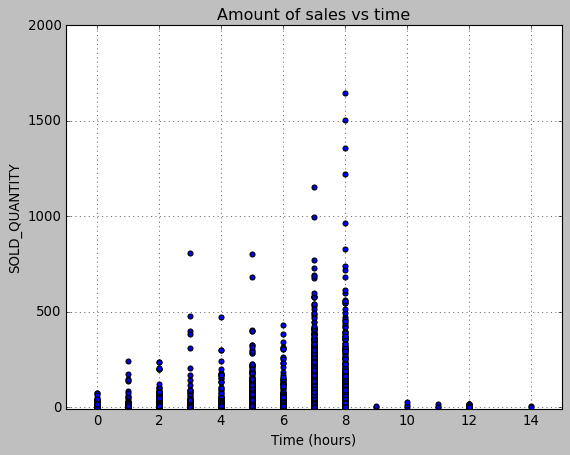

In [273]:
x = data["hours"]
y = data["SOLD_QUANTITY"]

plt.style.use('classic')

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=100)
ax.set(xlabel='Time (hours)', ylabel='SOLD_QUANTITY', title='Amount of sales vs time',)

ax.set(xlim=(-1, 15), ylim=(-10, 2000))
ax.grid()

plt.show()

Ahora quiero graficar el porcetaje de ventas en función de stock vs horas que dura la publicación, para poder sacar mejores conclusiones.

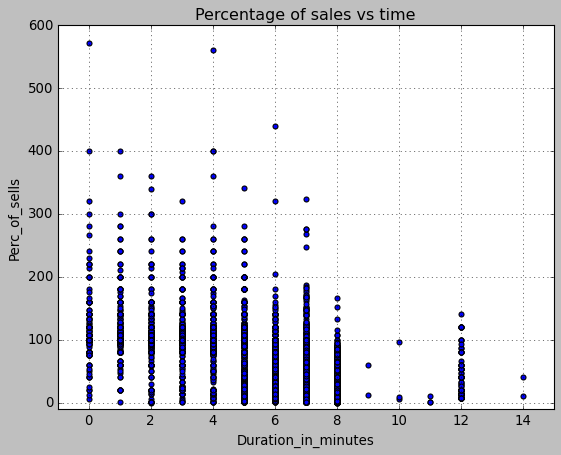

In [274]:
x = data["hours"]
y = data["Perc_of_sells"]

plt.style.use('classic')

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=100)
ax.set(xlabel='Duration_in_minutes', ylabel='Perc_of_sells', title='Percentage of sales vs time',)

ax.set(xlim=(-1, 15), ylim=(-10, 600))
ax.grid()

plt.show()

Grafico el porcetaje de ventas en función de stock vs los minutos que dura la publicación.

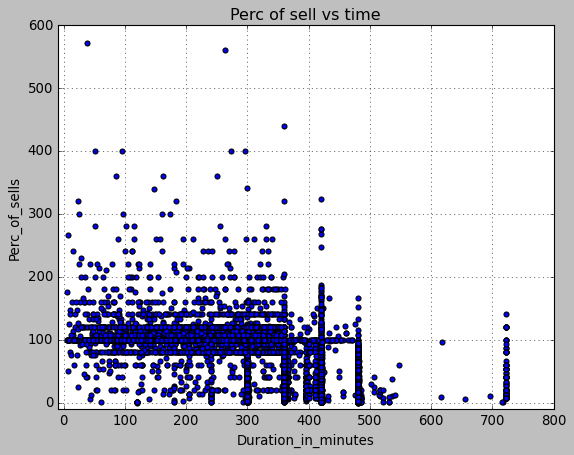

In [275]:
#x = data["Duration_in_minutes"]
x = data["Duration_in_minutes"]
y = data["Perc_of_sells"]

plt.style.use('classic')

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=100)
ax.set(xlabel='Duration_in_minutes', ylabel='Perc_of_sells', title='Perc of sell vs time',)

ax.set(xlim=(-10, 800), ylim=(-10, 600))
ax.grid()

plt.show()

Puedo ver que hasta 8 horas de duración de la publicación se logra vender todo el stock y en algunos casos hasta mas de 5 veces el stock publicado. 
Pareciera que tener las publicaciones más tiempo no dan mayores beneficios. Es cierto que las publicaciones que duran 12 horas, 
pueden haber vendido todos sus productos dentro de la primer hora, eso no lo sabemos con los datos que tenemos porque pareciera que la 
publicación no se corta al superar las ventas del stock publicado

Voy a limpiar un poco el dataset para poder trabajarlo mejor quedandome con las columnas que necesito

In [276]:
data.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Year', 'Month', 'Day',
       'Duration', 'hours', 'minutes', 'seconds', 'Duration_in_minutes',
       'Perc_of_sells'],
      dtype='object')

In [277]:
data_clean = data[['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Month', 'Day', 'Duration_in_minutes',
       'Perc_of_sells']]
data_clean.head(2)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,Month,Day,Duration_in_minutes,Perc_of_sells
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS,6,22,422.716667,150.0
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6,22,360.033333,NaN


Cuales fueron los 5 productos que tuvieron mayor porcentaje de ventas? se ve que fueron:
1 - Auriculares
2 - TOYS_AND_GAMES (algun juego que no me doy cuenta qué es)
3 - tazas y vasos térmicos
4 - Linternas
5 - Alimento para perros y gatos

In [278]:
prodc_mas_vendidos = data_clean.sort_values("Perc_of_sells",ascending = False)
prodc_mas_vendidos.head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,Month,Day,Duration_in_minutes,Perc_of_sells
32275,2021-07-15,2021-07-15 19:00:00+00:00,2021-07-15 21:50:19+00:00,15,-192,207.0,none,COMPUTERS,CE,MLM-HEADPHONES,7,15,170.316667,1380.000000
41045,2021-06-15,2021-06-15 13:00:00+00:00,2021-06-15 13:26:57+00:00,5,-70,65.0,none,TOYS AND GAMES,T & B,MLM-TOYS_AND_GAMES,6,15,26.950000,1300.000000
8872,2021-06-06,2021-06-06 19:00:00+00:00,2021-06-06 19:51:25+00:00,5,-32,37.0,none,SPORTS,APP & SPORTS,MLM-THERMAL_CUPS_AND_TUMBLERS,6,6,51.416667,740.000000
37920,2021-07-22,2021-07-22 13:00:00+00:00,2021-07-22 13:35:02+00:00,5,-26,31.0,none,SPORTS,APP & SPORTS,MLM-FLASHLIGHTS,7,22,35.033333,620.000000
86,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:38:21+00:00,7,-33,40.0,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,6,22,38.350000,571.428571


Cuales fueron los 5 productos que tuvieron el menor porcentaje de ventas? los cuales fueron:
1 - Relojes pulsera
2 - Oximetros
3 - Celulares
4 - Productos electrónicos
5 - Bombillas

In [279]:
prodc_menos_vendidos = data_clean.sort_values("Perc_of_sells")
prodc_menos_vendidos.head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,Month,Day,Duration_in_minutes,Perc_of_sells
38578,2021-07-29,2021-07-29 11:00:00+00:00,2021-07-29 19:00:01+00:00,3000,2998,2.0,none,APPAREL ACCESORIES,APP & SPORTS,MLM-WRISTWATCHES,7,29,480.016667,0.066667
42711,2021-07-02,2021-07-02 12:00:00+00:00,2021-07-02 20:00:00+00:00,1300,1299,1.0,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-OXIMETERS,7,2,480.000000,0.076923
45799,2021-07-26,2021-07-26 17:00:00+00:00,2021-07-27 01:00:02+00:00,2000,1931,2.0,free_shipping,MOBILE,CE,MLM-CELLPHONES,7,26,480.033333,0.100000
45622,2021-07-26,2021-07-26 22:00:00+00:00,2021-07-27 00:00:00+00:00,1000,999,1.0,free_shipping,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS,7,26,120.000000,0.100000
45979,2021-07-26,2021-07-26 22:00:00+00:00,2021-07-27 00:00:00+00:00,800,799,1.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-LIGHT_BULBS,7,26,120.000000,0.125000


Ahora me gustaría ver qué categoría es la más vendida.

In [280]:
#categ_ventas = data_clean.groupby(["VERTICAL","Perc_of_sells"]).sum()
categ_ventas_vertical = data_clean.groupby("VERTICAL")["Perc_of_sells"].mean().sort_values(ascending = False)
categ_ventas_vertical

VERTICAL
ACC                46.052228
BEAUTY & HEALTH    45.678883
CPG                44.596755
HOME & INDUSTRY    41.187685
CE                 39.002030
APP & SPORTS       38.245764
T & B              36.227014
ENTERTAINMENT      35.978464
OTHERS             35.210751
Name: Perc_of_sells, dtype: float64

Como categoría vertical, la que mayor porcentaje de ventas tuvo fue "ACC"

In [281]:
categ_ventas_domainID = data_clean.groupby(["DOM_DOMAIN_AGG1","DOMAIN_ID"])["Perc_of_sells"].mean().sort_values(ascending = False)
categ_ventas_domainID.head(40)

DOM_DOMAIN_AGG1         DOMAIN_ID                             
SPORTS                  MLM-THERMAL_CUPS_AND_TUMBLERS             390.000000
PHARMACEUTICS           MLM-NASAL_CPAP_MASKS                      300.000000
MOBILE                  MLM-SIM_CARDS                             200.000000
ELECTRONICS             MLM-CAMERA_STRAPS                         160.000000
CLEANING                MLM-KITCHEN_PAPER_TOWELS                  140.000000
HOME&DECOR              MLM-TEA_INFUSERS                          140.000000
                        MLM-LAUNDRY_WASH_BALLS                    140.000000
                        MLM-KITCHEN_POTHOLDERS_AND_OVEN_MITTS     140.000000
OTHER                   MLM-ESOTERIC_PENDULUMS                    120.000000
TOOLS AND CONSTRUCTION  MLM-HAND_TRUCKS                           120.000000
TOYS AND GAMES          MLM-CHALKBOARDS_AND_WHITEBOARDS           120.000000
CLEANING                MLM-LAUNDRY_BAR_SOAPS                     107.023810
TOOLS AND CON

In [282]:
categ_ventas = data_clean.groupby("DOM_DOMAIN_AGG1")["Perc_of_sells"].mean().sort_values(ascending = False)
categ_ventas

DOM_DOMAIN_AGG1
PETS FOOD                       68.366973
WHEELS & TIRES                  55.000000
BATTERIES                       52.581699
PHARMACEUTICS                   49.710774
VEHICULAR MULTIMEDIA            48.801020
AUTOPARTS                       48.085551
SECURITY                        46.913635
CLEANING                        46.187915
SPORTS                          44.747669
ANTIQUES & HOBBIES              44.444444
PARTY                           43.502160
COMPUTERS                       43.435738
OTHER                           43.333333
PERSONAL CARE                   42.422741
INDUSTRY                        42.165368
HOME&DECOR                      42.151355
DRINKS                          41.832923
MOTOPARTS                       40.455005
BEAUTY EQUIPMENT                40.042673
FOODS                           39.609832
STATIONARY                      39.552310
TOYS AND GAMES                  39.435297
MOBILE                          38.397330
APPAREL ACCESORIES

Como categoría "DOM_DOMAIN_AGG1", la que mayor porcentaje de ventas tuvo fue "ACC".

Hay una categoría que no tiene ventas, chekeo que AGRO no tenga ventas. Hay un sólo producto en esta categoría y no tiene ventas

In [283]:
mask = (data_clean["DOM_DOMAIN_AGG1"] == "AGRO")
data_agro = data_clean[mask]      
data_agro

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,Month,Day,Duration_in_minutes,Perc_of_sells
15593,2021-06-03,2021-06-03 19:00:00+00:00,2021-06-04 01:00:12+00:00,10,10,NaN,free_shipping,AGRO,ACC,MLM-EAR_TAG_APPLICATORS,6,3,360.2,NaN


La categoría "DOM_DOMAIN_AGG1" que más vendió fue "pets food", qué productos exactamente fueron los que más se vendieron?

In [284]:
mask_petsfood = (data_clean["DOM_DOMAIN_AGG1"] == categ_ventas.index[0])
petsfood = data_clean[mask_petsfood]
petsfood_gb = petsfood.groupby("DOMAIN_ID")["Perc_of_sells"].mean().sort_values(ascending = False)
petsfood_gb

DOMAIN_ID
MLM-BIRD_FOODS                     95.238095
MLM-CATS_AND_DOGS_FOODS            78.972115
MLM-FISH_FOODS                     54.093567
MLM-CATS_AND_DOGS_TREATS           47.133534
MLM-DOG_SUPPLEMENTS                32.411616
MLM-REPTILE_AND_AMPHIBIAN_FOODS          NaN
Name: Perc_of_sells, dtype: float64

En porcentaje de ventas en función del stock publicado, los productos que más se vendieron fueron los alimentos para pájaros seguido del alimento para perros y gatos y luego el alimento de peces

In [285]:
petsfood_gb = petsfood.groupby("DOMAIN_ID")["SOLD_QUANTITY"].sum().sort_values(ascending = False)
petsfood_gb

DOMAIN_ID
MLM-CATS_AND_DOGS_FOODS            1196.0
MLM-DOG_SUPPLEMENTS                 119.0
MLM-CATS_AND_DOGS_TREATS            101.0
MLM-FISH_FOODS                       19.0
MLM-BIRD_FOODS                       16.0
MLM-REPTILE_AND_AMPHIBIAN_FOODS       0.0
Name: SOLD_QUANTITY, dtype: float64

Pero en función de la cantidad, el producto que se más se vendió fue el alimento para perros y gatos y luego los suplementos para perros. Quiero ver este mismo análisis pero con todas las categorías.

In [286]:
for categoria in categ_ventas.index:
    print("\n############################## ",categoria," ##############################\n")
    print("\nPorcentaje de ventas en función de la cantidad de stock:\n")
    mask_petsfood = (data_clean["DOM_DOMAIN_AGG1"] == categoria)
    petsfood = data_clean[mask_petsfood]
    petsfood_gb = petsfood.groupby("DOMAIN_ID")["Perc_of_sells"].mean().sort_values(ascending = False)
    print(petsfood_gb)
    print("\nTotal de productos vendidos:\n")
    petsfood_gb = petsfood.groupby("DOMAIN_ID")["SOLD_QUANTITY"].sum().sort_values(ascending = False)
    print(petsfood_gb)


##############################  PETS FOOD  ##############################


Porcentaje de ventas en función de la cantidad de stock:

DOMAIN_ID
MLM-BIRD_FOODS                     95.238095
MLM-CATS_AND_DOGS_FOODS            78.972115
MLM-FISH_FOODS                     54.093567
MLM-CATS_AND_DOGS_TREATS           47.133534
MLM-DOG_SUPPLEMENTS                32.411616
MLM-REPTILE_AND_AMPHIBIAN_FOODS          NaN
Name: Perc_of_sells, dtype: float64

Total de productos vendidos:

DOMAIN_ID
MLM-CATS_AND_DOGS_FOODS            1196.0
MLM-DOG_SUPPLEMENTS                 119.0
MLM-CATS_AND_DOGS_TREATS            101.0
MLM-FISH_FOODS                       19.0
MLM-BIRD_FOODS                       16.0
MLM-REPTILE_AND_AMPHIBIAN_FOODS       0.0
Name: SOLD_QUANTITY, dtype: float64

##############################  WHEELS & TIRES  ##############################


Porcentaje de ventas en función de la cantidad de stock:

DOMAIN_ID
MLM-AUTOMOTIVE_TIRES             65.0
MLM-ALL_TERRAIN_VEHICLE_TIRES   

De acá podemos ver por ejemplo, que la segunda categoría "WHEELS & TIRES" tuvo que como producto mayor vendido en porcentaje y cantidad fueron los neumáticos de autos. Y así sucesivamente se pueden ver todas las categorías.

Realizo un boxplot de manera de poder visualizar los resultados anteriores de una manera más amistosa. Comienzo graficando el porcentaje de ventas en función de la categoría "VERTICAL" y luego en función de "DOM_DOMAIN_AGG1".

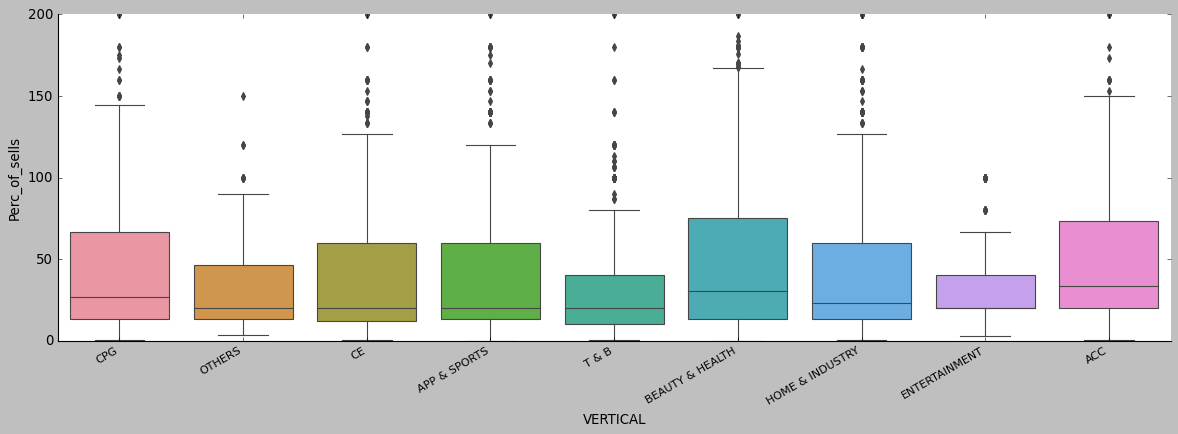

In [287]:
g = sns.catplot(x="VERTICAL", y="Perc_of_sells", kind="box", data=data_clean, height=5, aspect=3)
g.set_xticklabels(rotation=30,fontsize=10,ha='right')
plt.ylim(0,200)
g

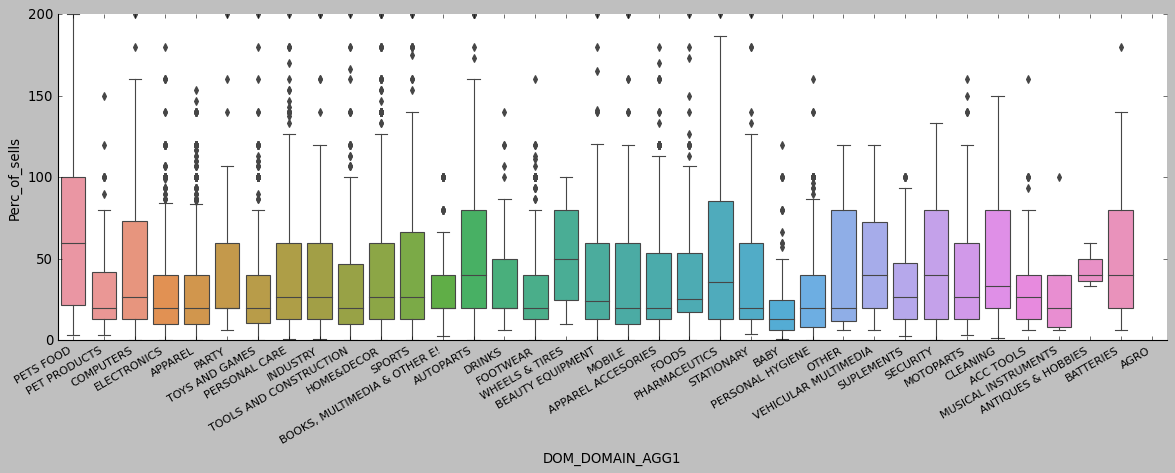

In [290]:
g = sns.catplot(x="DOM_DOMAIN_AGG1", y="Perc_of_sells", kind="box", data=data_clean, height=5, aspect=3)
g.set_xticklabels(rotation=30,fontsize=10,ha='right')
plt.ylim(0,200)
g

In [288]:
#g = sns.catplot(x="VERTICAL", y="Perc_of_sells", kind="violin", data=data_clean, height=5, aspect=3)
#g.set_xticklabels(rotation=30,fontsize=10,ha='right')
#plt.ylim(-50,200)
#g

Por último quiero ver cómo es la matriz de correlación para ver si puedo encontrar alguna correlación que me permita desarrollar un análisis o incluso alguna conclusion pero creo que el resultado de la matriz no está bien. Esto es porque veo una correlación negativa entre el stock disponible y la duración en minutos de la publicación. No lo tengo del todo claro pero tal vez es por que las columnas no son todas del mismo tipo de datos.

<AxesSubplot:>

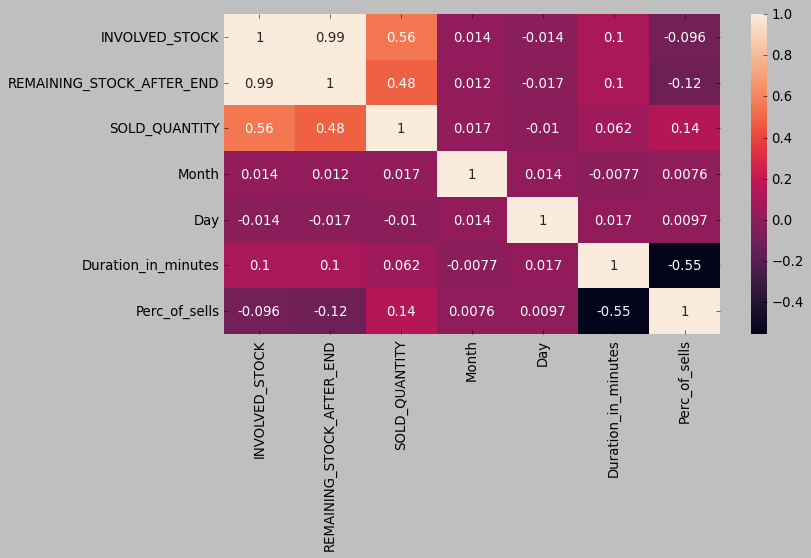

In [289]:
fig =plt.subplots(figsize=(10,5))
sns.heatmap(data_clean.corr(), annot=True)

## **Ideas para continuar el análisis**

Algunas cosas que se podrían seguir investigando son:
 - Ver si el envío gratuito afecta las ventas.
 - Se podría armar un diagrama de barras dividido en mañana, tarde y noche en función del porcentaje de ventas. De esta forma se puede analizar si el momento del día influye en las ventas. También se puede dividir en días de semana y fines de semana.
 - Lo anterior se puede dividir en categorías y ver si las diferentes categorias tiene distintos comportamientos en función del horario y momento del día.
 - Los productos que más se vendieron son los más baratos o los más caros?